In [1]:
from google.colab import drive
drive.mount('./googledrive')

Mounted at ./googledrive


In [2]:
%cd /content/googledrive/My Drive/data_mining_prac/Task2

/content/googledrive/My Drive/data_mining_prac/Task2


In [3]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=43ae2d6f6d52150fd555c82f0f98c1daee07a4de9c6ec0002fa1ebc8a7acb8ba
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [4]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=fa63d88ba5f1cfafc4925c6c873d6fd257fa7c363ae40dd218692818a62f4a8c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


#前処理

In [5]:
import re
import unicodedata
import pandas as pd

In [ ]:
#要約文をクリーニングする
def clearning_text(s):
  #不要な部分の削除
  m_s=re.search('【課題】|【目的】|【効果】',s)
  if m_s:
    pos1=m_s.end()
    s=s[pos1:]
    m_e=re.search('【',s)
    if m_e:
      pos2=m_e.start()
      s = s[:pos2]
  m_ex=re.search('【選択図】',s)
  if m_ex:
    pos3=m_ex.start()
    s=s[:pos3]
  #括弧の削除と半角全角の統一
  pattern = r"\([^)]*\)|\<[^>]*\>|【[^【|^】]*】"
  s=re.sub(pattern,'',s)
  s=unicodedata.normalize('NFKC', s)
  return s

##文字列の確認とテスト

In [ ]:
test_string1='(57)【要約】\
【課題】  Ｘ線のピーク波形を正確に捕えることがで<BR>き、しかもＸ線強度分布にずれを生じることの無いＸ線<BR>回折測定方法を提供する。\
【解決手段】  連続法Ｘ線回折測定方法を用いて回折Ｘ<BR>線図形Ａを求める測定方法において、測定間隔をδと<BR>し、測定点の角度位置を２θn とするとき、測定点２θ<BR>n に対応する累積Ｘ線強度の測定開始点を（２θn －δ<BR>／２）とし、その開始点から測定間隔δの間の累積Ｘ線<BR>強度を求め、その求められた累積Ｘ線強度を測定点２θ<BR>n におけるＸ線強度として決定する。測定点２θn を開<BR>始点として累積Ｘ線強度を演算するのではないので、得<BR>られたＸ線強度分布にズレが生じない。また、連続法Ｘ<BR>線回折測定を用いるので、ピーク波形の見落としもな<BR>い。\
'
test_string2='(57)【要約】\
３つの部分、即ち検査装置、コンピュータシステム及びこれら２つの間の通信ラインよりなるシステム。検査装置はＸ線を試料中に放射する装置と、試料をＸ線に対して位置決めする装置と、回折されたＸ線を検出する電気－光学的検出器とを有する。コンピュータシステムはコンピュータ、コンピュータプログラム、記憶装置、データベース、検査の結果を表示するモニターまたは他の手段を有する。コンピュータプログラムは、コンピュータに指令を与えて、試料検査装置からの各装置、Ｘ線及び回折Ｘ線の関係に関するデータを受ける。コンピュータプログラムはまた、コンピュータに指令を与えて、このデータを、記憶装置に記憶させた以前に求めた関係及び起こり得る回折パターンのデータベースと比較させる。比較に基づき、コンピュータプログラムはコンピュータに指令を与えて、比較結果をモニターまたは他の手段を介して表示させ、それにより試料の結晶粒構造を明らかにする。本発明の方法は、試料をＸ線手段から放射されるＸ線の通路内で位置決めし、電気－光学的検出器により回折されたＸ線を検出し、データを分析して、分析ステップに基づき試料の結晶粒構造を表示させる。\
'

test_string3='(57)【要約】\
【目的】  浮遊状態の粉末粒子にＸ線を照射し、物質の<BR>同定や結晶構造の解明に必要なＸ線回折スペクトルを得<BR>る。\
【構成】  粉末試料１を流動状態で保持する容器２の中<BR>心に向けて、入射側Ｘ線発散角度制限器３により発散角<BR>度１０ミリラジアン以下の平行Ｘ線を照射する。粉末試<BR>料１の一部が不特定の位置で発する二次Ｘ線のうち、指<BR>定した方向の発散角度１０ミリラジアン以下の平行な二<BR>次Ｘ線を、容器２を中心として回転可能な受光側Ｘ線発<BR>散角度制限器４で選択透過させる。\
【効果】  浮遊状態にある不特定方位の結晶粒子から発<BR>せられる発散角度１０ミリラジアン以下の平行な二次Ｘ<BR>線が効率よく捕捉されるため、正確な反射強度をもった<BR>Ｘ線回折スペクトルが得られる。\
'

test_string4='(57)【要約】\
  Ｘ線回折分析装置用のＸ線検出器であって、センサと<BR>、読出し回路と、プロセッサと、表示デバイスに表示信<BR>号を通信する表示出力部とを備えるＸ線検出器である。<BR>センサは、センサに入射するＸ線光子をセンサ出力信号<BR>に変換することにより、Ｘ線光子を検出する。読出し回<BR>路は、センサからセンサ出力信号を受信し、センサ出力<BR>信号をカウントすることによりＸ線光子のカウント数を<BR>決定する。プロセッサは、Ｘ線光子のカウント数を用い<BR>てＸ線強度値を計算し、且つ、Ｘ線強度値を表す画像を<BR>表示するための表示信号を生成するように構成されてい<BR>る。表示出力部は、Ｘ線強度値を表示するための表示デ<BR>バイスに、表示信号を通信するように構成されている。\
【選択図】図２'

In [ ]:
series_a=pd.Series([test_string1,test_string3,test_string4])
series_a=series_a.map(clearning_text)
series_a

0      X線のピーク波形を正確に捕えることができ、しかもX線強度分布にずれを生じることの無いX線...
1      浮遊状態の粉末粒子にX線を照射し、物質の同定や結晶構造の解明に必要なX線回折スペクトルを得る。
2      X線回折分析装置用のX線検出器であって、センサと、読出し回路と、プロセッサと、表示デバイ...
dtype: object

In [ ]:
clearning_text(test_string1)

'  Ｘ線のピーク波形を正確に捕えることができ、しかもＸ線強度分布にずれを生じることの無いＸ線回折測定方法を提供する。'

In [ ]:
clearning_text(test_string2)

'3つの部分、即ち検査装置、コンピュータシステム及びこれら2つの間の通信ラインよりなるシステム。検査装置はX線を試料中に放射する装置と、試料をX線に対して位置決めする装置と、回折されたX線を検出する電気-光学的検出器とを有する。コンピュータシステムはコンピュータ、コンピュータプログラム、記憶装置、データベース、検査の結果を表示するモニターまたは他の手段を有する。コンピュータプログラムは、コンピュータに指令を与えて、試料検査装置からの各装置、X線及び回折X線の関係に関するデータを受ける。コンピュータプログラムはまた、コンピュータに指令を与えて、このデータを、記憶装置に記憶させた以前に求めた関係及び起こり得る回折パターンのデータベースと比較させる。比較に基づき、コンピュータプログラムはコンピュータに指令を与えて、比較結果をモニターまたは他の手段を介して表示させ、それにより試料の結晶粒構造を明らかにする。本発明の方法は、試料をX線手段から放射されるX線の通路内で位置決めし、電気-光学的検出器により回折されたX線を検出し、データを分析して、分析ステップに基づき試料の結晶粒構造を表示させる。'

In [ ]:
clearning_text(test_string4)

'  Ｘ線回折分析装置用のＸ線検出器であって、センサと、読出し回路と、プロセッサと、表示デバイスに表示信号を通信する表示出力部とを備えるＸ線検出器である。センサは、センサに入射するＸ線光子をセンサ出力信号に変換することにより、Ｘ線光子を検出する。読出し回路は、センサからセンサ出力信号を受信し、センサ出力信号をカウントすることによりＸ線光子のカウント数を決定する。プロセッサは、Ｘ線光子のカウント数を用いてＸ線強度値を計算し、且つ、Ｘ線強度値を表す画像を表示するための表示信号を生成するように構成されている。表示出力部は、Ｘ線強度値を表示するための表示デバイスに、表示信号を通信するように構成されている。'

##データセットの前処理

In [ ]:
#特許出願技術動向調査よりX線回折にまつわる特許をcsvで取得(1971～1997)
df1=pd.read_csv('特実_国内文献19980101.csv')
df1.head()

,文献番号,出願番号,出願日,公知日,発明の名称,出願人/権利者,FI,要約,公開番号,公告番号,登録番号,審判番号,その他,ステージ,イベント詳細,文献URL
0,特表2000-507700,特願平09-535302,1997/03/19,1997/10/09,Ｘ線回折を用いて表面下結晶構造を検知するための装置及び方法,ウェスチングハウス・エレクトリック・コーポレイション,"G01N23/20,G01N23/203,G01N23/207",(57)【要約】\r\n３つの部分、即ち検査装置、コンピュータシステム及びこれら２つの間の通...,特表2000-507700,NaN,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
1,特開平09-257725,特願平08-093333,1996/03/21,1997/10/03,Ｘ線回折測定方法及びその装置,株式会社リガク,G01N23/207,(57)【要約】\r\n【課題】 Ｘ線のピーク波形を正確に捕えることがで<BR>き、しかも...,特開平09-257725,NaN,特許3519207,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
2,特開平09-229881,特願平08-041716,1996/02/28,1997/09/05,Ｘ線回折装置,株式会社島津製作所,"G01N23/20,G01N23/207,G21K1/06@F,G01N23/2209",(57)【要約】\r\n【課題】湾曲結晶を用いたＸ線回折装置用モノクロメー<BR>タの調整箇...,特開平09-229881,NaN,特許3116805,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
3,特開平09-229880,特願平08-041715,1996/02/28,1997/09/05,Ｘ線回折装置,株式会社島津製作所,"G01N23/207,G01N23/20,G01N23/20,320,G01N23/2002...",(57)【要約】\r\n【課題】回転粉末試料台と繊維試料台の機能を合わせ持<BR>ち、調整の...,特開平09-229880,NaN,特許3168902,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
4,特開平09-222401,特願平08-052541,1996/02/16,1997/08/26,微小領域Ｘ線回折装置,株式会社リガク,"G01N23/20,G21K1/06@M,G01N23/207",(57)【要約】\r\n【課題】 試料のＸ線照射領域のうちの限られた微小領<BR>域からの...,特開平09-222401,NaN,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...


In [ ]:
#特許出願技術動向調査よりX線回折にまつわる特許をcsvで取得(1997～1923)
df2=pd.read_csv('特実_国内文献20231130.csv')
df2.head()

,文献番号,出願番号,出願日,公知日,発明の名称,出願人/権利者,FI,要約,公開番号,公告番号,登録番号,審判番号,その他,ステージ,イベント詳細,文献URL
0,特開2023-169846,特願2022-125870,2022/08/05,2023/11/30,Ｘ線回折測定方法およびＸ線回折測定装置,国立研究開発法人量子科学技術研究開発機構,"G01N23/207,G01N23/20",(57)【要約】\r\n【課題】微小結晶粒の安定的なＸ線回折測定を実現する<BR>。\r\n...,特開2023-169846,NaN,NaN,NaN,NaN,審査請求前,公開公報の発行,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
1,特開2023-140749,特願2022-046746,2022/03/23,2023/10/05,損傷測定方法、装置、プログラムおよびＸ線回折装置,"株式会社リガク,中部電力株式会社","G01N23/2055,G01N23/20008",(57)【要約】\r\n【課題】周囲の状態にかかわらず、単結晶状態の試料の<BR>損傷を測定...,特開2023-140749,NaN,NaN,NaN,NaN,審査請求前,公開公報の発行,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
2,特開2023-118009,特願2022-020882,2022/02/14,2023/08/24,Ｘ線回折装置及び計測方法,株式会社リガク,G01N23/207,(57)【要約】 （修正有）\r\n【課題】本発明の一態様によれば、Ｘ線回折装置が...,特開2023-118009,NaN,NaN,NaN,NaN,審査請求前,公開公報の発行,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
3,特開2023-113581,特願2023-010449,2023/01/26,2023/08/16,粉末Ｘ線回折測定に用いられる試料ホルダーへの試料充填用治具、および当該試料充填用治具を用いた...,住友金属鉱山株式会社,"G01N23/20025,G01N1/28@W,G01N23/2005",(57)【要約】\r\n【課題】粉末Ｘ線回折測定用の平板型試料ホルダーへ粉<BR>末試料を充...,特開2023-113581,NaN,NaN,NaN,NaN,審査請求前,公開公報の発行,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
4,特開2023-108083,特願2022-009040,2022/01/25,2023/08/04,Ｘ線回折測定装置及びＸ線回折測定方法,パルステック工業株式会社,"G01N23/205,G01N23/20",(57)【要約】\r\n【課題】 撮像されたラウエ斑点像が基準のラウエ斑点<BR>像と模様...,特開2023-108083,NaN,NaN,NaN,NaN,審査中,審査請求,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...


In [ ]:
#データ量の都合上2ファイルに分かれていた部分を統合
df=pd.concat([df1,df2])
df['出願日']=pd.to_datetime(df['出願日'],format='%Y/%m/%d')
df['公知日']=pd.to_datetime(df['公知日'],format='%Y/%m/%d')
df=df.sort_values('出願日')
df=df.reset_index(drop=True)
df.iloc[0:20]

,文献番号,出願番号,出願日,公知日,発明の名称,出願人/権利者,FI,要約,公開番号,公告番号,登録番号,審判番号,その他,ステージ,イベント詳細,文献URL
0,特開昭48-016683,特願昭46-049289,1971-07-06,1973-03-02,Ｘ センカイセツソウチ,リガクデンキ カブシキガイシヤ,"G01N23/207,G01N23/20,310,G01N23/20008",NaN,特開昭48-016683,特公昭50-035834,特許0820661,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
1,特開昭48-024780,特願昭46-056778,1971-07-30,1973-03-31,エツクス センカイセツカメラ,トウキヨウシバウラデンキ カブシキガイシヤ,"G01N23/205,G01N23/20,310,G01N23/20008",NaN,特開昭48-024780,特公昭51-014397,特許0840107,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
2,特開昭48-059887,特願昭46-094308,1971-11-24,1973-08-22,Ｘ センカイセツソウチ,カブシキガイシヤ シマヅ セイサクシヨ,"G01L1/00@A,G01N23/207,G01N23/20,315,G01N23/20016",NaN,特開昭48-059887,特公昭53-009109,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
3,特開昭48-063777,特願昭46-097853,1971-12-06,1973-09-04,Ｘ センカイセツケンビゾウカンソクソウチ,リガクデンキ カブシキガイシヤ,"G01N23/20,G21K7/00,G01N23/205,G01N23/04",NaN,特開昭48-063777,特公昭50-038353,特許0822425,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
4,特開昭48-069589,特願昭46-103625,1971-12-22,1973-09-21,キヨクテンズケイ エツクス センカイセツソウチ,トウキヨウシバウラデンキ カブシキガイシヤ,G01N23/207,NaN,特開昭48-069589,NaN,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
5,特開昭48-073191,特願昭47-002534,1971-12-28,1973-10-02,ソウサガタ Ｘ センカイセツゾウソクテイソウチ,ニホンデンシ カブシキガイシヤ,G01N23/207,NaN,特開昭48-073191,NaN,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
6,特開昭48-075084,特願昭47-004391,1972-01-06,1973-10-09,タンケツシヨウ Ｘ センカイセツソウチ,ニホンデンシ カブシキガイシヤ,G01N23/207,NaN,特開昭48-075084,NaN,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
7,特開昭49-066188,特願昭47-106647,1972-10-26,1974-06-26,Ｘ センカイセツケンビソウチ,リガクデンキ カブシキガイシヤ,"C09K15/06,G01N23/20,G01N23/207,G01N23/20,310,G...",NaN,特開昭49-066188,特公昭52-025276,特許0895719,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
8,特開昭48-068293,特願昭47-122991,1972-12-07,1973-09-18,フンマツノ Ｘ センカイセツブンセキヨウカメラ,フイリツプス エレクトロニクス エンド フア－マシユ－テイカル インダストリ－ズ コ－ポレ－シヨン,G01N23/205,NaN,特開昭48-068293,特公昭52-010399,特許0882141,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
9,特開昭49-099085,特願昭48-010682,1973-01-27,1974-09-19,Ｘ センカイセツシリヨウノ オンドセイギヨソウチ,リガクデンキ カブシキガイシヤ,"G01N1/28@K,G01N23/20,G01N23/20,322,G01N23/2003...",NaN,特開昭49-099085,特公昭52-049992,特許0921648,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...


In [ ]:
#発明の名称の不要な空白を削除
table = str.maketrans({
  '\u3000': '',
  ' ': '',
  '\t': ''
})
df['発明の名称']=df['発明の名称'].str.translate(table)

df['発明の名称'].unique()

array(['Ｘセンカイセツソウチ', 'エツクスセンカイセツカメラ', 'Ｘセンカイセツケンビゾウカンソクソウチ',
       'キヨクテンズケイエツクスセンカイセツソウチ', 'ソウサガタＸセンカイセツゾウソクテイソウチ',
       'タンケツシヨウＸセンカイセツソウチ', 'Ｘセンカイセツケンビソウチ', 'フンマツノＸセンカイセツブンセキヨウカメラ',
       'Ｘセンカイセツシリヨウノオンドセイギヨソウチ', 'タンケツシヨウノＸセンカイセカトポグラフイホウトソレオオコナウタメノソウチ',
       'ソ－ラ－・スリツトを利用したエネルギ－分散型Ｘ線回折測定方法',
       'エネルギ－ブンサンガタＸセンカイセツケイオモチイテキヨクセイケツシヨウノキヨクセイノムキオケツテイスルホウホウ',
       '６メンカアツホウシキニヨルチヨウコウアツハツセイソウチニシヨウスルＸセンカイセツソウチ',
       'ソウサガタＸセンカイセツゾクソクテイソウチ', 'Ｘセンカイセツゾウチヨクシソウチ', 'ソウサガタＸセンカイセツケンビソウチ',
       'Ｘセンカイセツソウチオヨビリユウタイホウコウヅケソウチ', 'Ｘセンカイセツケンビステレオカンサツソウチ',
       'Ｘセンカイセツヨウシリヨウホ－ルダ－', 'セイゲンシヤＸセンカイセツソウチ',
       'Ｘセンカイセキヒズミソクテイホウホウオヨビソウチ', 'ハクシヨクＸセンホウシヤセンニヨルＸセンカイセツソクテイソウチ',
       'Ｘセンカイセツハノヘンコウホウホウ', 'Ｘセンカイセツケイ', 'Ｘセンカイセツシヤシンサツエイソウチ', 'Ｘ線露光方法',
       'エツクスセンカイセツソウチ', 'Ｘセンカイセツパタ－ンカイセキヨウケイサンジヤク',
       'Ｘセンカイセツ－ヒネツブンセキドウジソクテイニオケルシリヨウホルダ－', 'ビシヨウブＸセンカイセツソウチ',
       'Ｘセンカイセツカメラヨウカヘンソウセンスクリ－ン', 'ソウサガタＸセンカイセツケンビホウカメラ', 'Ｘ線回折装置用標本保持器',
       'Ｘセンカイセツソクテイソウチ', 'Ｘセンカイセツシヤシンヨウシリヨウチヨウセツソウチ', 'Ｘセ

In [ ]:
#発明の名称の表記をできる限り統一
df['発明の名称']=df['発明の名称'].replace({'Ｘセンカイセツソウチ':'X線回折装置', 'エツクスセンカイセツカメラ':'X線回折カメラ', 'Ｘセンカイセツケンビゾウカンソクソウチ':'X線回折顕微像観測装置',
       'キヨクテンズケイエツクスセンカイセツソウチ':'極点図形X線回折装置', 'ソウサガタＸセンカイセツゾウソクテイソウチ':'走査型X線回折像測定装置',
       'タンケツシヨウＸセンカイセツソウチ':'単結晶X線回折装置', 'Ｘセンカイセツケンビソウチ':'X線回折顕微装置', 'フンマツノＸセンカイセツブンセキヨウカメラ':'粉末X線回折分析用カメラ',
       'Ｘセンカイセツシリヨウノオンドセイギヨソウチ':'X線回折試料温度制御装置', 'タンケツシヨウノＸセンカイセカトポグラフイホウトソレオオコナウタメノソウチ':'単結晶X線回折トポグラフィー法と装置',
       'エネルギ－ブンサンガタＸセンカイセツケイオモチイテキヨクセイケツシヨウノキヨクセイノムキオケツテイスルホウホウ':'X線回折装置',
       '６メンカアツホウシキニヨルチヨウコウアツハツセイソウチニシヨウスルＸセンカイセツソウチ':'六面加圧方式による超高圧発生装置に使用するX線回折装置',
       'ソウサガタＸセンカイセツゾクソクテイソウチ':'走査型X線回折測定装置', 'Ｘセンカイセツゾウチヨクシソウチ':'X線回折像直視装置', 'ソウサガタＸセンカイセツケンビソウチ':'走査型X線回折顕微装置',
       'Ｘセンカイセツケンビステレオカンサツソウチ':'X線回折顕微ステレオ観察装置',
       'Ｘセンカイセツヨウシリヨウホ－ルダ－':'X線回折装置用試料ホルダー', 'セイゲンシヤＸセンカイセツソウチ':'制限視野X線回折装置',
       'Ｘセンカイセキヒズミソクテイホウホウオヨビソウチ':'X線解析ひずみ測定方法と装置', 'ハクシヨクＸセンホウシヤセンニヨルＸセンカイセツソクテイソウチ':'白色X線放射線によるX線回折測定装置',
       'Ｘセンカイセツハノヘンコウホウホウ':'X線回折波の偏光方法', 'Ｘセンカイセツケイ':'X線回折計', 'Ｘセンカイセツシヤシンサツエイソウチ':'X線回折視野新撮影装置',
       'エツクスセンカイセツソウチ':'X線回折装置', 'Ｘセンカイセツパタ－ンカイセキヨウケイサンジヤク':'X線回折パターン解析用計算尺',
       'Ｘセンカイセツ－ヒネツブンセキドウジソクテイニオケルシリヨウホルダ－':'X線回折と比熱分析同時測定における試料ホルダー', 'ビシヨウブＸセンカイセツソウチ':'微小部X線回折装置',
       'Ｘセンカイセツカメラヨウカヘンソウセンスクリ－ン':'X線回折カメラ用可変層線スクリーン', 'ソウサガタＸセンカイセツケンビホウカメラ':'走査型X線回折顕微法カメラ',
       'Ｘセンカイセツソクテイソウチ':'X線回折測定装置', 'Ｘセンカイセツシヤシンヨウシリヨウチヨウセツソウチ':'X線回折視野信用試料調節装置', 'Ｘセンカイセツカクソクテイソウチ':'X線回折角測定装置'})

In [ ]:
df['発明の名称'].unique()

array(['X線回折装置', 'X線回折カメラ', 'X線回折顕微像観測装置', '極点図形X線回折装置', '走査型X線回折像測定装置',
       '単結晶X線回折装置', 'X線回折顕微装置', '粉末X線回折分析用カメラ', 'X線回折試料温度制御装置',
       '単結晶X線回折トポグラフィー法と装置', 'ソ－ラ－・スリツトを利用したエネルギ－分散型Ｘ線回折測定方法',
       '六面加圧方式による超高圧発生装置に使用するX線回折装置', '走査型X線回折測定装置', 'X線回折像直視装置',
       '走査型X線回折顕微装置', 'Ｘセンカイセツソウチオヨビリユウタイホウコウヅケソウチ', 'X線回折顕微ステレオ観察装置',
       'X線回折装置用試料ホルダー', '制限視野X線回折装置', 'X線解析ひずみ測定方法と装置',
       '白色X線放射線によるX線回折測定装置', 'X線回折波の偏光方法', 'X線回折計', 'X線回折視野新撮影装置',
       'Ｘ線露光方法', 'X線回折パターン解析用計算尺', 'X線回折と比熱分析同時測定における試料ホルダー', '微小部X線回折装置',
       'X線回折カメラ用可変層線スクリーン', '走査型X線回折顕微法カメラ', 'Ｘ線回折装置用標本保持器', 'X線回折測定装置',
       'X線回折視野信用試料調節装置', 'X線回折角測定装置', 'Ｘセンカイセツニヨルシヨウケツコウセイジヨウノソクテイホウホウ',
       'Ｘ線回折法', '粉末Ｘ線回折用密封容器', '白色Ｘ線回折装置', 'Ｘ線回折試料設定装置',
       'Ｘ線無定形エスシンおよびその製法', 'Ｘ線回折試料保持装置', 'Ｘ線回折法およびそれに使用する装置', 'Ｘ線回折装置',
       'Ｘ線回折用結晶およびその製造方法', 'Ｘ線回折測定方法およびその装置', '球面波セクショントポグラフ用Ｘ線回折顕微撮影装置',
       'Ｘ線回折のピ－ク角度換算スケ－ル', 'Ｘ線回折用チヤ－ト紙', 'Ｘ線回折による磁歪定数測定方法',
       'Ｘ線回折法による集合組識をもつα＋γ２相組織の体積率定量装置', '携帯用Ｘ線回折測定装置',


In [ ]:
#要約に欠損値があるので名称で埋める
df['要約'].fillna(df['発明の名称'], inplace=True)

In [ ]:
df.head()

,文献番号,出願番号,出願日,公知日,発明の名称,出願人/権利者,FI,要約,公開番号,公告番号,登録番号,審判番号,その他,ステージ,イベント詳細,文献URL
0,特開昭48-016683,特願昭46-049289,1971-07-06,1973-03-02,X線回折装置,リガクデンキ カブシキガイシヤ,"G01N23/207,G01N23/20,310,G01N23/20008",X線回折装置,特開昭48-016683,特公昭50-035834,特許0820661,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
1,特開昭48-024780,特願昭46-056778,1971-07-30,1973-03-31,X線回折カメラ,トウキヨウシバウラデンキ カブシキガイシヤ,"G01N23/205,G01N23/20,310,G01N23/20008",X線回折カメラ,特開昭48-024780,特公昭51-014397,特許0840107,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
2,特開昭48-059887,特願昭46-094308,1971-11-24,1973-08-22,X線回折装置,カブシキガイシヤ シマヅ セイサクシヨ,"G01L1/00@A,G01N23/207,G01N23/20,315,G01N23/20016",X線回折装置,特開昭48-059887,特公昭53-009109,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
3,特開昭48-063777,特願昭46-097853,1971-12-06,1973-09-04,X線回折顕微像観測装置,リガクデンキ カブシキガイシヤ,"G01N23/20,G21K7/00,G01N23/205,G01N23/04",X線回折顕微像観測装置,特開昭48-063777,特公昭50-038353,特許0822425,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
4,特開昭48-069589,特願昭46-103625,1971-12-22,1973-09-21,極点図形X線回折装置,トウキヨウシバウラデンキ カブシキガイシヤ,G01N23/207,極点図形X線回折装置,特開昭48-069589,NaN,NaN,NaN,NaN,NaN,NaN,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...


In [ ]:
#欠損値確認
df.isnull().sum()

文献番号         0
出願番号         0
出願日          0
公知日          0
発明の名称        0
出願人/権利者      0
FI           0
要約           0
公開番号         1
公告番号       749
登録番号       446
審判番号       804
その他        851
ステージ       513
イベント詳細     513
文献URL        0
dtype: int64

In [ ]:
#要約文をテキストクリーニング
table = str.maketrans({
  '\u3000': '',
  ' ': '',
  '\t': '',
  '\r': '',
  '\n' : ''
})
df['要約']=df['要約'].str.translate(table)
df['要約']=df['要約'].map(clearning_text)

In [ ]:
df.iloc[len(df)-5:]

,文献番号,出願番号,出願日,公知日,発明の名称,出願人/権利者,FI,要約,公開番号,公告番号,登録番号,審判番号,その他,ステージ,イベント詳細,文献URL
850,特開2022-174025,特願2022-077319,2022-05-10,2022-11-22,Ｘ線回折による高分子測定方法,"ダイキン工業株式会社,国立研究開発法人産業技術総合研究所",G01N23/20,表面(界面)における高分子の運動を測定でき、X線の全反射状態で高分子を観測することによって、...,特開2022-174025,NaN,NaN,拒絶2023-004675,NaN,査定不服,拒絶査定不服審判請求,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
851,特開2023-004979,特願2022-101826,2022-06-24,2023-01-17,アレイ検知による短波長特徴Ｘ線回折装置及び方法,中国兵器工業第五九研究所,"G01N23/207,G01N23/20008",本発明は、アレイ検知による短波長特徴X線回折測定装置、及び当該装置による測定分析方法を開示する。,特開2023-004979,NaN,NaN,NaN,NaN,審査中,拒絶理由通知,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
852,特開2023-169846,特願2022-125870,2022-08-05,2023-11-30,Ｘ線回折測定方法およびＸ線回折測定装置,国立研究開発法人量子科学技術研究開発機構,"G01N23/207,G01N23/20",微小結晶粒の安定的なX線回折測定を実現する。,特開2023-169846,NaN,NaN,NaN,NaN,審査請求前,公開公報の発行,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
853,特開2023-113581,特願2023-010449,2023-01-26,2023-08-16,粉末Ｘ線回折測定に用いられる試料ホルダーへの試料充填用治具、および当該試料充填用治具を用いた...,住友金属鉱山株式会社,"G01N23/20025,G01N1/28@W,G01N23/2005",粉末X線回折測定用の平板型試料ホルダーへ粉末試料を充填する際、当該平板型試料ホルダーを直接に...,特開2023-113581,NaN,NaN,NaN,NaN,審査請求前,公開公報の発行,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...
854,特開2023-075325,特願2023-044179,2023-03-20,2023-05-30,Ｘ線回折による高分子測定方法,"ダイキン工業株式会社,国立研究開発法人産業技術総合研究所","G01N23/2055,310,G01N23/205",表面(界面)における高分子の運動を測定でき、X線の全反射状態で高分子を観測することによって、...,特開2023-075325,NaN,NaN,NaN,NaN,審査請求前,公開公報の発行,https://www.j-platpat.inpit.go.jp/c1800/PU/JP-...


In [ ]:
#欠損値確認
df.isnull().sum()

文献番号         0
出願番号         0
出願日          0
公知日          0
発明の名称        0
出願人/権利者      0
FI           0
要約           0
公開番号         1
公告番号       749
登録番号       446
審判番号       804
その他        851
ステージ       513
イベント詳細     513
文献URL        0
dtype: int64

In [ ]:
df.to_csv('Xray_patentdata.csv',index=False)

#要約の分散表現をクラスタリング

In [9]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap

In [10]:
from sentence_transformers import SentenceTransformer

In [9]:
#seriesの要素のnumpy arrayをインデックス順に保存
def save_arrays(series_x,path='./arrays0'):
  index=[str(i) for i in series_x.index]
  val=list(series_x.values)
  array_dic=dict(zip(index,val))
  np.savez_compressed(path, **array_dic)
  print('Saved')

#numpy arrayの読み込み、Seriesで返す
def load_arrays(path):
  arrays=np.load(path)
  index=arrays.files
  val=[arrays[i] for i in index]
  return pd.Series(data=val,index=index)

##sentence-transformers/distiluse-base-multilingual-cased-v2

In [94]:
#要約をembeddingベクトルに
df2=pd.read_csv('Xray_patentdata.csv')
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
df2['要約ベクトル']=df2['要約'].apply(model.encode)

In [95]:
save_arrays(df2['要約ベクトル'],path='./embedding_vactor2.npz')

Saved


In [96]:
#正規化
df2['要約ベクトル']=df2['要約ベクトル'].apply(lambda x : x/np.linalg.norm(x,ord=2))

##k近傍法

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

best n_clusters= 3


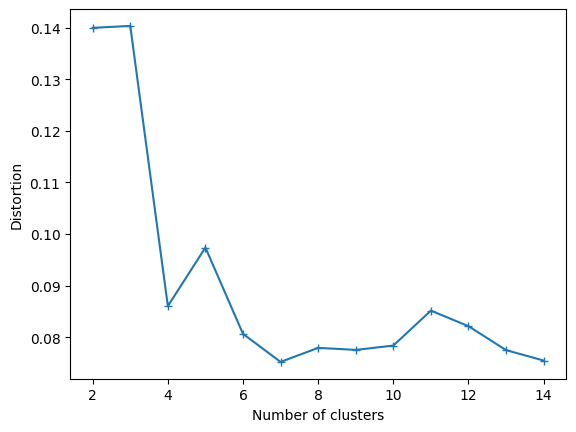

In [97]:
#k近傍法の最適なクラスタ数の探索
X=df2['要約ベクトル'].values.tolist()
score =[]
best_clusters=0
best_score=-1
for i in range(2,15):
    kmeans= KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    label=kmeans.predict(X)
    result=silhouette_score(X, label)
    score.append(result)

    if result>best_score:
      best_score=result
      best_clusters=i

plt.plot(range(2,15), score, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
print('best n_clusters=',best_clusters)

In [98]:
#最適なクラスタ数でクラスタリング
kmeans= KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
cluster_label=kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [99]:
#要約ラベルとしてデータフレームに追加
df2['要約ラベル']=cluster_label
y=df2['要約ラベル'].to_numpy()

##Umapで次元削減

In [100]:
#クラスタリングを視覚化のためにembeddingベクトルをumapで次元削減
mapper = umap.UMAP(n_components=2, n_neighbors=30, n_epochs=400, random_state=0)
embedding = mapper.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


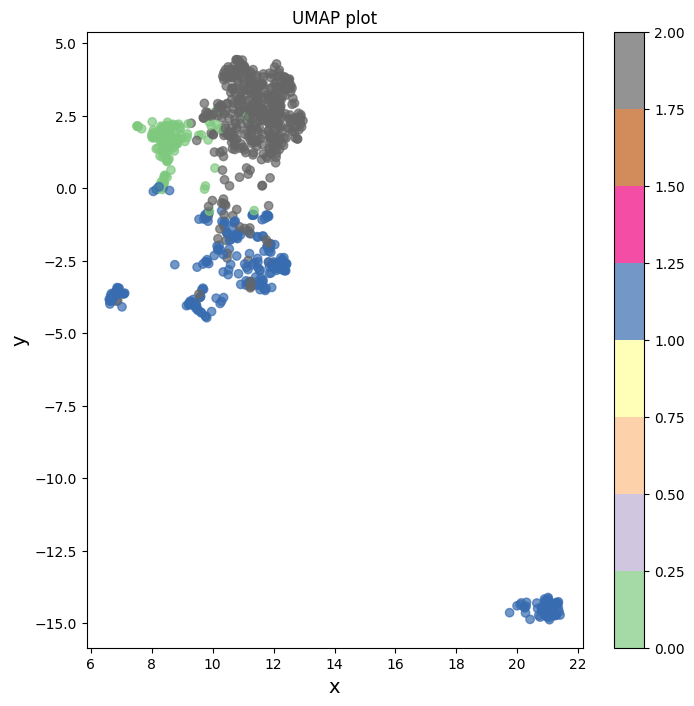

In [102]:
#要約ベクトルのクラスタリング視覚化
map_x=embedding[:,0]
map_y=embedding[:,1]
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
plt.scatter(map_x,map_y,
    c=df2['要約ラベル'].to_numpy(), cmap='Accent', alpha=0.7)
plt.title('UMAP plot')
plt.colorbar()
plt.show()

In [105]:
df2.to_csv('./emb_label_f.csv',index=False)

#データの視覚化

In [11]:
#pyplot共通コンフィグ
config={
    "font.family":'sans-serif',
    "figure.dpi":100,
    "xtick.labelsize":12,
    "ytick.labelsize":12,
    "xtick.major.size":8,
    "xtick.major.width":3.0,
    "ytick.major.size":8,
    "ytick.major.width":3.0,
    "xtick.major.pad":20,
    "ytick.major.pad":20,
    "axes.linewidth":4.0,
}

plt.rcParams.update(config)

In [12]:
! pip install japanize-matplotlib

In [13]:
import japanize_matplotlib

In [67]:
#ロード
df2=pd.read_csv('./emb_label_f.csv')

In [70]:
#ラベルと内容の確認
df2[['要約','要約ラベル']]

,要約,要約ラベル
0,X線回折装置,1
1,X線回折カメラ,1
2,X線回折装置,1
3,X線回折顕微像観測装置,1
4,極点図形X線回折装置,1
...,...,...
850,表面(界面)における高分子の運動を測定でき、X線の全反射状態で高分子を観測することによって、...,2
851,本発明は、アレイ検知による短波長特徴X線回折測定装置、及び当該装置による測定分析方法を開示する。,2
852,微小結晶粒の安定的なX線回折測定を実現する。,0
853,粉末X線回折測定用の平板型試料ホルダーへ粉末試料を充填する際、当該平板型試料ホルダーを直接に...,2


In [15]:
#ラベルごとの数
df2.groupby('要約ラベル').size()

要約ラベル
0    117
1    314
2    424
dtype: int64

##出願年と公知日

In [17]:
#日付をdatetimeに
df2['出願日']=pd.to_datetime(df2['出願日'])
df2['公知日']=pd.to_datetime(df2['公知日'])

(array([ 37.,  30.,  61., 133., 190.,  95.,  78.,  46.,  70.,  75.,  40.]),
 array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
        2015., 2020., 2025.]),
 <BarContainer object of 11 artists>)

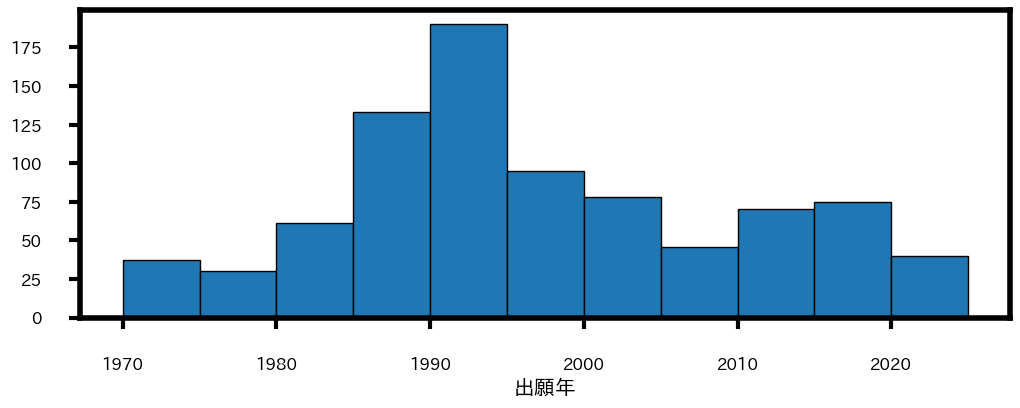

In [20]:
#出願年の分布
bins=range(1970,2030,5)
plt.figure(figsize = (12, 4))
plt.xlabel('出願年', fontsize=15)
plt.hist(x=df2['出願日'].dt.year, bins=bins, ec='black')

(array([ 15.,  43.,  53., 105., 205.,  99.,  81.,  62.,  55.,  87.,  50.]),
 array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
        2015., 2020., 2025.]),
 <BarContainer object of 11 artists>)

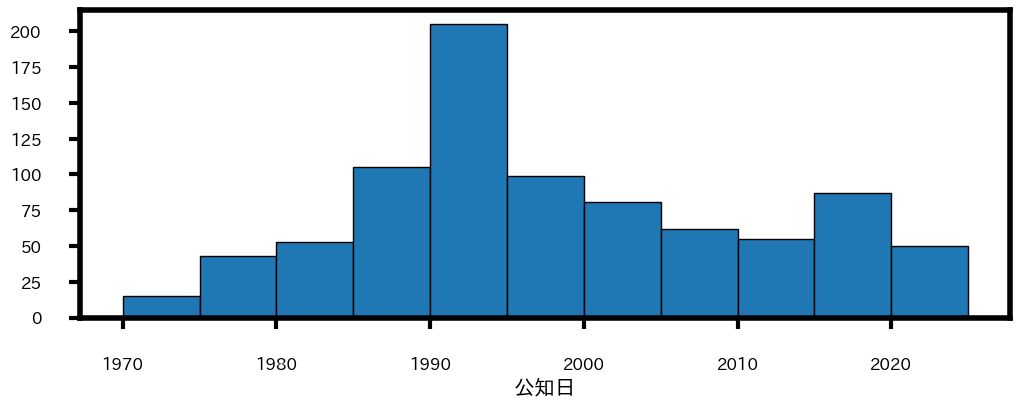

In [21]:
#公知年の分布
bins=range(1970,2030,5)
plt.figure(figsize = (12, 4))
plt.xlabel('公知日', fontsize=15)
plt.hist(x=df2['公知日'].dt.year, bins=bins, ec='black')

##出願人/権利者

In [22]:
#テキストクリーニング
table = str.maketrans({
  '\u3000': '',
  ' ': '',
  '\t': ''
})
#空白の削除、全角半角統一
df2['出願人/権利者']=df2['出願人/権利者'].str.translate(table)
df2['出願人/権利者']=df2['出願人/権利者'].str.normalize(form='NFKC')
df2['出願人/権利者'].unique()

array(['リガクデンキカブシキガイシヤ', 'トウキヨウシバウラデンキカブシキガイシヤ', 'カブシキガイシヤシマヅセイサクシヨ',
       'ニホンデンシカブシキガイシヤ', 'フイリツプスエレクトロニクスエンドフア-マシユ-テイカルインダストリ-ズコ-ポレ-シヨン',
       'ヴアレリ-パヴロヴイツチエフアノフ', '東京大学', 'トウキヨウダイガク', 'カブシキガイシヤコウベセイコウシヨ',
       'カブシキガイシヤヒタチセイサクシヨ', 'シンテツクスコ-ポレ-シヨン', 'ホソヤスケアキ',
       'カブシキガイシヤコマツセイサクシヨ', 'マツクスプランクゲゼルシヤフトツ-ルフエルデルングデルビツセンシヤフテンエ-フアウ',
       'ノ-スアメリカンフイリツプスコ-ポレ-シヨン', 'ニコレツトインストルメントコ-ポレ-シヨン', 'フジツウカブシキガイシヤ',
       'カブシキガイシヤダイニセイコウシヤ', 'シンクウリコウカブシキガイシヤ', 'ニツポンデンキカブシキガイシヤ',
       'エヌベ-フイリツプスフル-イランペンフアブリケン', '日本電子株式会社', 'ニツポンコウカンカブシキガイシヤ',
       '三菱重工業株式会社', '工業技術院長', '株式会社日立製作所', '理学電機株式会社',
       'ドクトル・マダウス・ウント・コンパニイ', 'ナシヨナル・インステイチユ-ト・フオ・メタラジイ',
       '超エル・エス・アイ技術研究組合', 'ノ-ス・アメリカン・フイリツプス・コ-ポレ-シヨン', '小倉康嗣', '大木茂',
       'トヨタ自動車工業株式会社', '富士通株式会社', '住友金属工業株式会社', '株式会社島津製作所', '新日本製鐵株式会社',
       '株式会社東芝', 'シ-メンス・アクチエンゲゼルシヤフト',
       'ヘンケル・コマンデイ-トゲゼルシヤフト・アウフ・アクチエン,ドイツチエ・ゴ-ルド・ウント・ジルベル・シヤイデアンスタルト・フオ-ルマ-ルス・ロエツスレル',
       'ヘンケル・コマンデイ-トゲゼルシヤフト・アウフ・アクチエン,ドイツチエ・ゴ-ルド・ウント・ジルベル・シヤイデアンス・タ

In [27]:
#表記ゆれをできるだけなくす
df2['出願人/権利者']=df2['出願人/権利者'].replace({'リガクデンキカブシキガイシヤ':'理学電機株式会社', 'トウキヨウシバウラデンキカブシキガイシヤ':'株式会社東芝', 'カブシキガイシヤシマヅセイサクシヨ':'株式会社島津製作所',
       'ニホンデンシカブシキガイシヤ':'日本電子株式会社','トウキヨウダイガク':'東京大学','カブシキガイシヤコウベセイコウシヨ':'株式会社神戸製鋼所',
       'カブシキガイシヤヒタチセイサクシヨ':'株式会社日立製作所','カブシキガイシヤコマツセイサクシヨ':'株式会社小松製作所',
       'フジツウカブシキガイシヤ':'富士通株式会社','カブシキガイシヤダイニセイコウシヤ':'セイコーインスツル株式会社', 'シンクウリコウカブシキガイシヤ':'アドバンス理工株式会社', 'ニツポンデンキカブシキガイシヤ':'日本電気株式会社',
       'ニツポンコウカンカブシキガイシヤ':'日鉄鋼管株式会社',
       'ヘンケル・コマンデイ-トゲゼルシヤフト・アウフ・アクチエン,ドイツチエ・ゴ-ルド・ウント・ジルベル・シヤイデアンスタルト・フオ-ルマ-ルス・ロエツスレル':'ヘンケル・コマンデイ-トゲゼルシヤフト・アウフ・アクチエン,ドイツチエ・ゴ-ルド・ウント・ジルベル・シヤイデアンス・タルト・フオ-ルマ-ルス・ロエツスレル',
       '株式会社マック・サイエンス':'株式会社マックサイエンス','理学電機株式会社':'株式会社リガク','理学電機株式会社':'株式会社リガク'})
df2['出願人/権利者'].unique()

array(['株式会社リガク', '株式会社東芝', '株式会社島津製作所', '日本電子株式会社',
       'フイリツプスエレクトロニクスエンドフア-マシユ-テイカルインダストリ-ズコ-ポレ-シヨン',
       'ヴアレリ-パヴロヴイツチエフアノフ', '東京大学', '株式会社神戸製鋼所', '株式会社日立製作所',
       'シンテツクスコ-ポレ-シヨン', 'ホソヤスケアキ', '株式会社小松製作所',
       'マツクスプランクゲゼルシヤフトツ-ルフエルデルングデルビツセンシヤフテンエ-フアウ',
       'ノ-スアメリカンフイリツプスコ-ポレ-シヨン', 'ニコレツトインストルメントコ-ポレ-シヨン', '富士通株式会社',
       'セイコーインスツル株式会社', 'アドバンス理工株式会社', '日本電気株式会社',
       'エヌベ-フイリツプスフル-イランペンフアブリケン', '日鉄鋼管株式会社', '三菱重工業株式会社', '工業技術院長',
       'ドクトル・マダウス・ウント・コンパニイ', 'ナシヨナル・インステイチユ-ト・フオ・メタラジイ',
       '超エル・エス・アイ技術研究組合', 'ノ-ス・アメリカン・フイリツプス・コ-ポレ-シヨン', '小倉康嗣', '大木茂',
       'トヨタ自動車工業株式会社', '住友金属工業株式会社', '新日本製鐵株式会社', 'シ-メンス・アクチエンゲゼルシヤフト',
       'ヘンケル・コマンデイ-トゲゼルシヤフト・アウフ・アクチエン,ドイツチエ・ゴ-ルド・ウント・ジルベル・シヤイデアンス・タルト・フオ-ルマ-ルス・ロエツスレル',
       '日本エツクス線株式会社', '理学電機工業株式会社', '三井石油化学工業株式会社',
       'エリオツト・ブラザ-ス(ロンドン)リミテツド', '川崎製鉄株式会社', '米田泰治,近浦吉則', 'クラリオン株式会社',
       '日立化成工業株式会社', '三菱重工業株式会社,理学電機株式会社', '株式会社日本製鋼所', '栗田政則',
       '日本発条株式会社', '財団法人産業創造研究所', 'ビンセント・ジヨン・マンナ-ズ', '栗田政則,株式会社小

In [28]:
#権利者の特許出願数の上位(10以上)を取得
tokkyo=df2.groupby('出願人/権利者').size()
tokkyo=tokkyo[tokkyo>9].sort_values(ascending=False)
tokkyo

出願人/権利者
株式会社リガク         242
株式会社島津製作所        86
パルステック工業株式会社     60
株式会社マックサイエンス     29
日本電気株式会社         25
住友金属鉱山株式会社       19
株式会社日立製作所        18
日本電子株式会社         15
株式会社東芝           12
新日鐵住金株式会社        11
住友電気工業株式会社       10
dtype: int64

Text(0, 0.5, '件数')

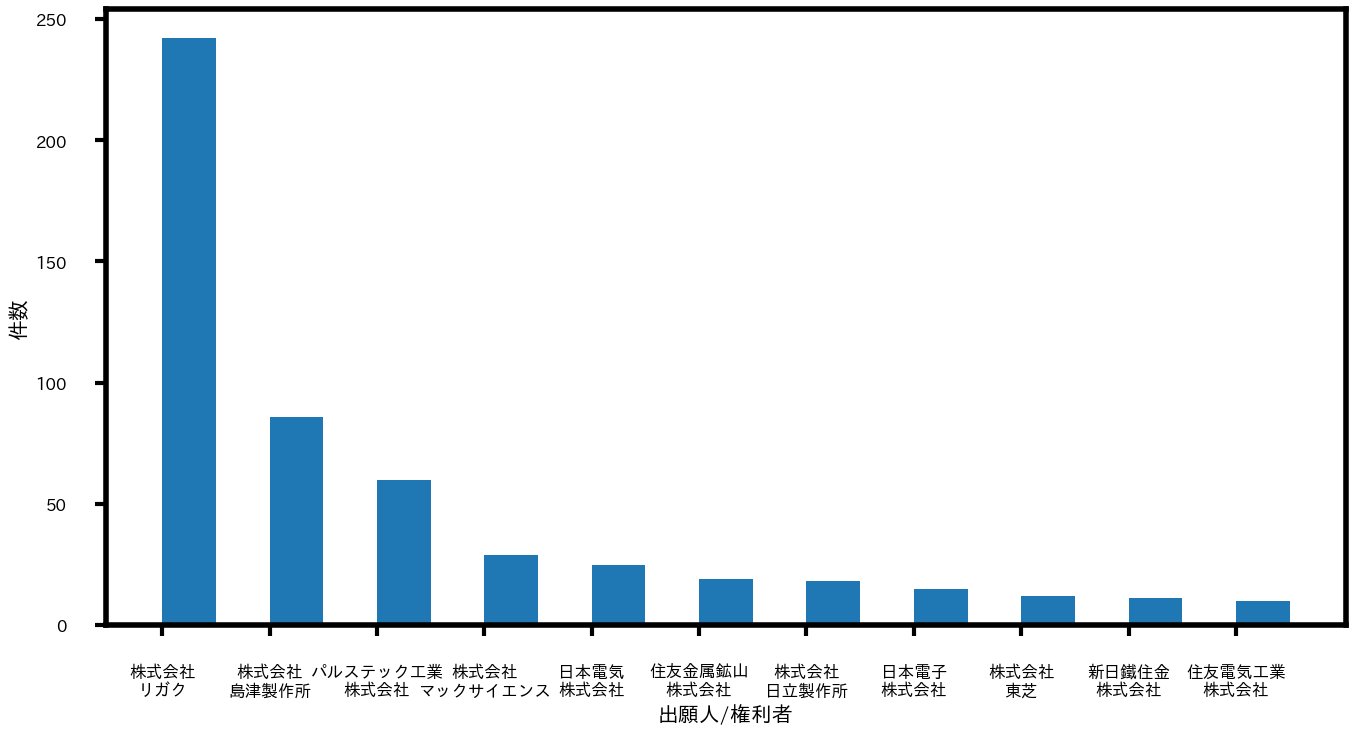

In [31]:
#権利者の特許出願数の上位(10以上)を表示
y = tokkyo.to_numpy()

x=['株式会社\nリガク', '株式会社\n島津製作所', 'パルステック工業\n株式会社', '株式会社\nマックサイエンス', '日本電気\n株式会社',
       '住友金属鉱山\n株式会社', '株式会社\n日立製作所', '日本電子\n株式会社', '株式会社\n東芝', '新日鐵住金\n株式会社',
       '住友電気工業\n株式会社']

plt.figure(figsize = (16, 8))

plt.bar(x, y, align='edge', width = 0.5)

plt.xlabel('出願人/権利者',fontsize=15)
plt.ylabel('件数',fontsize=15)

##公知日から出願日までの経過日数

In [59]:
#どれくらい公知までかかっているか調べる
days=[]
bins=range(100,800,100)
diff=df2['公知日']-df2['出願日']
for i in range(len(diff)-1):
  days.append(diff[i].days)
days
diff=pd.Series(days)
#100日間隔で分割
diff=pd.cut(diff,bins)
diff.value_counts

<bound method IndexOpsMixin.value_counts of 0      (600, 700]
1      (600, 700]
2      (600, 700]
3      (600, 700]
4      (600, 700]
          ...    
849    (500, 600]
850    (100, 200]
851    (200, 300]
852    (400, 500]
853    (200, 300]
Length: 854, dtype: category
Categories (11, interval[int64, right]): [(100, 200] < (200, 300] < (300, 400] < (400, 500] < ... <
                                          (800, 900] < (900, 1000] < (1000, 1100] < (1100, 1200]]>

Text(0.5, 0, '公知日と出願日の差(days)')

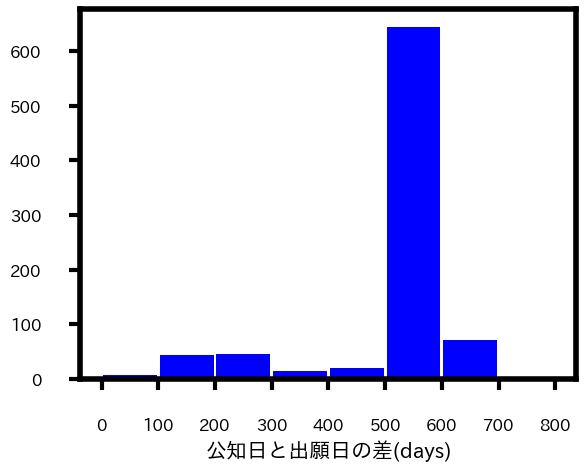

In [66]:
#公知日から出願日までの経過日数を視覚化
days=[]
bins=range(0,900,100)
diff=df2['公知日']-df2['出願日']
for i in range(len(diff)-1):
  days.append(diff[i].days)
days
diff=pd.Series(days)
bins=range(0,900,100)
plt.hist(diff, bins, color='blue', rwidth=.95)
plt.xticks(list(range(0, 900, 100)))
plt.xlabel('公知日と出願日の差(days)',fontsize=15)